# Project Group 32
## SVM Model - Cancer Classification

In [153]:
KFOLD_SPLITS = 10 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, confusion_matrix, classification_report, mean_squared_error, accuracy_score, precision_score, recall_score, r2_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display # Just for solution

drop_columns = ['id', 
                'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se',
                'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst',
                ]

df = pd.read_csv('Cancer_Data.csv')
df = df.drop(drop_columns, axis = 1)

cats = ["radius_mean","texture_mean", "smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","smoothness_se", "compactness_se","symmetry_se","radius_worst","texture_worst","smoothness_worst","compactness_worst","symmetry_worst"]
df['diagnosis_B'] = df['diagnosis'] == 'M'
df['diagnosis_B'] = df['diagnosis_B'].replace({True: 1, False: 0})

print(df['diagnosis_B'])
df = df.drop(columns=['diagnosis'])

print(df.shape)
display(df.head(100))

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_B, Length: 569, dtype: int64
(569, 17)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,diagnosis_B
0,17.990,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,25.38,17.33,0.1622,0.66560,0.4601,1
1,20.570,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,24.99,23.41,0.1238,0.18660,0.2750,1
2,19.690,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,23.57,25.53,0.1444,0.42450,0.3613,1
3,11.420,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,14.91,26.50,0.2098,0.86630,0.6638,1
4,20.290,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,22.54,16.67,0.1374,0.20500,0.2364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,0.09078,0.13130,0.2095,0.05649,0.7576,1.5090,0.006016,0.03482,0.02657,24.22,31.59,0.1190,0.35390,0.3689,1
96,12.180,17.84,0.10450,0.07057,0.1900,0.06635,0.3661,1.5110,0.005433,0.01179,0.02220,12.83,20.92,0.1140,0.09358,0.2227,0
97,9.787,19.94,0.10240,0.05301,0.1350,0.06890,0.3350,2.0430,0.011130,0.01463,0.01801,10.92,26.29,0.1316,0.09473,0.1934,0
98,11.600,12.84,0.08983,0.07525,0.1620,0.06582,0.2315,0.5391,0.006153,0.01330,0.01651,13.06,17.16,0.1431,0.18510,0.2772,0



Accuracy for batch  0  :  0.9298245614035088
Mean Square Error for batch  0  :  0.07017543859649122

Accuracy for batch  1  :  0.9122807017543859
Mean Square Error for batch  1  :  0.08771929824561403

Accuracy for batch  2  :  0.9824561403508771
Mean Square Error for batch  2  :  0.017543859649122806

Accuracy for batch  3  :  0.9649122807017544
Mean Square Error for batch  3  :  0.03508771929824561

Accuracy for batch  4  :  0.9824561403508771
Mean Square Error for batch  4  :  0.017543859649122806

Accuracy for batch  5  :  0.9824561403508771
Mean Square Error for batch  5  :  0.017543859649122806

Accuracy for batch  6  :  0.9824561403508771
Mean Square Error for batch  6  :  0.017543859649122806

Accuracy for batch  7  :  1.0
Mean Square Error for batch  7  :  0.0

Accuracy for batch  8  :  1.0
Mean Square Error for batch  8  :  0.0

Accuracy for batch  9  :  0.9107142857142857
Mean Square Error for batch  9  :  0.08928571428571429

Average Accuracy =  0.9647556390977444
Average 

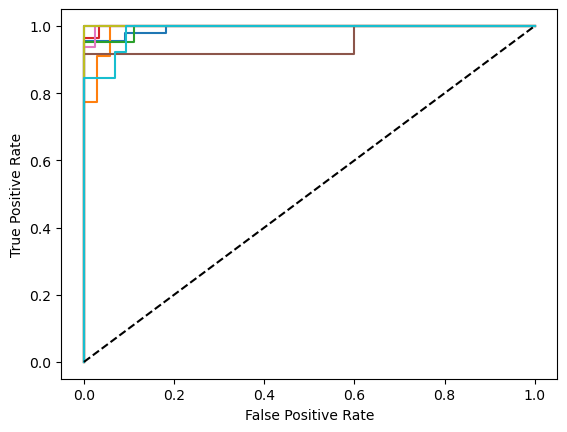

In [160]:
X = df.drop(columns=['diagnosis_B'])
y = df['diagnosis_B']

# Normalization
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

def KFoldAnalyze(X, y, K):
    kf = KFold(n_splits=K)
    models = []

    acc = 0
    mse = 0

    i = 0 #keep track of batch number
    # step 5: iterate k times with a different testing subset
    for train_indices, test_indices in kf.split(X):
        # step 2-3: use k-1/k^th partition for the training/testing model
        start_train, stop_train = train_indices[0], train_indices[-1]+1
        start_test, stop_test = test_indices[0], test_indices[-1]+1

        X_train, X_test = X[start_train:stop_train], X[start_test:stop_test]
        y_train, y_test = y[start_train:stop_train], y[start_test:stop_test] 

        # Do Log Reg
        svc_li = SVC(kernel='linear', probability=True)
        svc_li.fit(X_train, y_train)
        y_pred = svc_li.predict(X_test)

        y_prob = svc_li.predict_proba(X_test)
        details = {}
        
        train_mse = mean_squared_error(y_train, svc_li.predict(X_train))
        this_acc = accuracy_score(y_test, y_pred)
        this_mse = mean_squared_error(y_test, y_pred)
        
        # y_test, y_pred, y_prob
        details["y_test"] = y_test
        details["y_pred"] = y_pred 
        details["y_prob"] = y_prob 
        details["Bias"] = train_mse 
        details["Variance"] = this_mse - train_mse
        models.append(details)

        acc += this_acc
        mse += this_mse

        # step 4: record the evaluating scores
        print("\nAccuracy for batch ", i, " : ", this_acc)
        print("Mean Square Error for batch ", i, " : ", this_mse)

        i += 1

    # step 6: find the average and select the batch with highest evaluation scores
    print('\nAverage Accuracy = ', acc / K)
    print('Average MSE = ', mse / K)

    # Analyze models
    for model in models:
        y_test = model["y_test"]
        y_pred = model["y_pred"]
        y_prob = model["y_prob"]
        bias = model["Bias"]
        variance = model["Variance"]

        cmat = confusion_matrix(y_test, y_pred)

        print(f"Confusion Matrix:\n {cmat}")

        # Confusion matrix whose i-th row and j-th column entry indicates the number of 
        # samples with true label being i-th class and predicted label being j-th class.

        tp = cmat[1, 1]
        tn = cmat[0, 0]
        fp = cmat[0, 1]
        fn = cmat[1, 0]

        tpr = tp / (tp + fn) # RECALL/SENSITIVITY 
        print(f"TPR: {tpr}")

        tnr = tn / (tn + fp) # SPECIFICITY
        print(f"TNR: {tnr}") 

        print(classification_report(y_test, y_pred))
        
        try: 
            fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob[:, 1])
            auc1 = roc_auc_score(y_test, y_prob[:, 1])
        except ValueError:
            pass
        
        # separate these properly later
        plt.plot(fpr1, tpr1)
        print(f"AUC1 SCORE: {auc1}")
        print(f"BIAS: {bias}")
        print(f"VAR: {variance}")

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.show()
KFoldAnalyze(X, y, KFOLD_SPLITS)

### Notes about oversampling: 
- Oversampling reduces average accuracy
- ROC cannot be calculated for some of the folds (they only have malignant samples in them, so TNR is negative)

In [155]:
print(y.value_counts())

ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X, y)

print(y_os.value_counts())

0    357
1    212
Name: diagnosis_B, dtype: int64
1    357
0    357
Name: diagnosis_B, dtype: int64



Accuracy for batch  0  :  0.9722222222222222
Mean Square Error for batch  0  :  0.027777777777777776

Accuracy for batch  1  :  0.9444444444444444
Mean Square Error for batch  1  :  0.05555555555555555

Accuracy for batch  2  :  0.9861111111111112
Mean Square Error for batch  2  :  0.013888888888888888

Accuracy for batch  3  :  0.9861111111111112
Mean Square Error for batch  3  :  0.013888888888888888

Accuracy for batch  4  :  0.971830985915493
Mean Square Error for batch  4  :  0.028169014084507043

Accuracy for batch  5  :  0.9577464788732394
Mean Square Error for batch  5  :  0.04225352112676056

Accuracy for batch  6  :  1.0
Mean Square Error for batch  6  :  0.0

Accuracy for batch  7  :  0.9436619718309859
Mean Square Error for batch  7  :  0.056338028169014086

Accuracy for batch  8  :  0.971830985915493
Mean Square Error for batch  8  :  0.028169014084507043

Accuracy for batch  9  :  0.9859154929577465
Mean Square Error for batch  9  :  0.014084507042253521

Average Accurac

C:\Users\conta\AppData\Local\Temp\ipykernel_28668\742257333.py:82: RuntimeWarning: invalid value encountered in longlong_scalars
  tnr = tn / (tn + fp) # SPECIFICITY
C:\Users\conta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\conta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\conta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` para

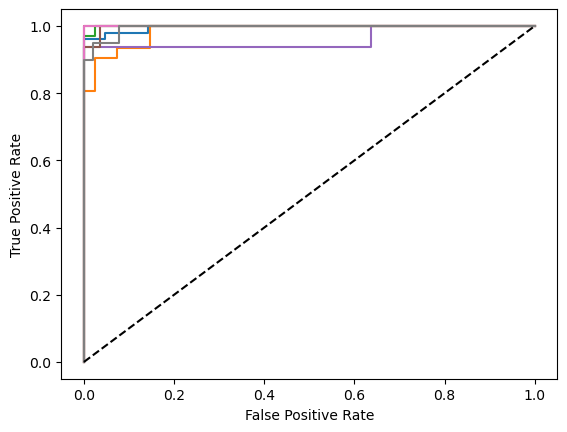

In [161]:
KFoldAnalyze(X_os, y_os, 10)

In [158]:
# Exporting model 
import pickle
cls = SVC(kernel="linear")
cls.fit(X, y)
pickle.dump(cls, open("Support-Vector-Machine", 'wb'))